<a href="https://colab.research.google.com/github/sky16k/pyda/blob/main/PYDA17_CorrRegr_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys
data_path = '/content/data'
try:
    os.symlink('/content/drive/MyDrive/скул/DS/data', data_path)
    sys.path.insert(0,data_path)
except:
    pass
# Then you can install a library, and specify the target.
# !pip install --target=$data_path vk_api_config.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Домашнее задание

## осн. текст

In [224]:
'''
Домашнее задание

1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и
средней годовой смертностью?
a. Построить точечный график
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
c. Построить модель линейной регрессии
d. Рассчитать коэффициент детерминации
e. Вывести график остатков

2. Сохраняется ли аналогичная зависимость для северных и южных городов
по отдельности?
a. Разделить данные на 2 группы
b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности
'''

'\nДомашнее задание\n\n1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и\nсредней годовой смертностью?\na. Построить точечный график\nb. Рассчитать коэффициенты корреляции Пирсона и Спирмена\nc. Построить модель линейной регрессии\nd. Рассчитать коэффициент детерминации\ne. Вывести график остатков\n\n2. Сохраняется ли аналогичная зависимость для северных и южных городов\nпо отдельности?\na. Разделить данные на 2 группы\nb. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности\n'

## Задание 1

###текст

In [225]:
# комментарий эксперта
'''

'''

'\n\n'

In [226]:
'''
1. Задача - ответить на вопрос есть ли связь 
между жёсткостью воды и
средней годовой смертностью?
a. Построить точечный график
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
c. Построить модель линейной регрессии
d. Рассчитать коэффициент детерминации
e. Вывести график остатков

'''

'\n1. Задача - ответить на вопрос есть ли связь \nмежду жёсткостью воды и\nсредней годовой смертностью?\na. Построить точечный график\nb. Рассчитать коэффициенты корреляции Пирсона и Спирмена\nc. Построить модель линейной регрессии\nd. Рассчитать коэффициент детерминации\ne. Вывести график остатков\n\n'

###программа

In [227]:
import pandas as pd
import matplotlib.pyplot as plt


In [228]:
df = pd.read_csv('/content/data/water.csv')

In [229]:
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


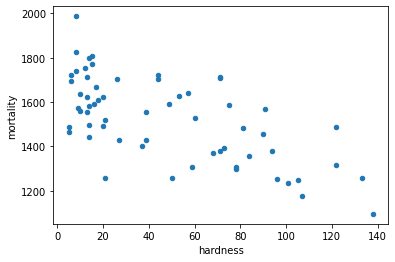

In [230]:
df.plot(kind='scatter', y='mortality', x='hardness')

In [231]:
#Пирсон
df[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [232]:
df[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Как видим,  если связь между жестокостью и смертностью и есть, то она отрицательная

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [234]:
X = df[['hardness']]
y = df['mortality']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [236]:
X_train.shape

(42, 1)

In [237]:
y_train.shape

(42,)

In [238]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [239]:
model.coef_

array([-3.13167087])

In [240]:
model.intercept_

1668.9722977277095

In [241]:
# y = coef_ * x + intercept_
# y = -3.1317 * x + 1669

Получили модель, описываемую формулой: y = -3.1317 * x + 1669

In [242]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [243]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
Name: mortality, dtype: int64

In [244]:
# коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

Модель не очень хорошо описывает отношение переменных. хотя общий тренд явно совпадает, однако велико влияние неучтённых факторов.

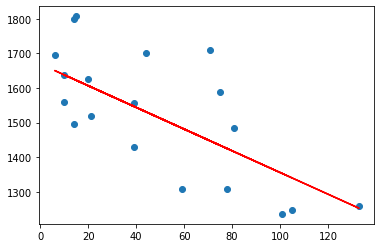

In [245]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [246]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [248]:
# добавить константу
X_const = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [249]:
X_const

,const,hardness
4,1.0,18
44,1.0,49
19,1.0,21
47,1.0,68
52,1.0,57
25,1.0,138
57,1.0,53
15,1.0,20
58,1.0,122
27,1.0,37


In [250]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           7.83e-06
Time:                        17:08:38   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [251]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912278


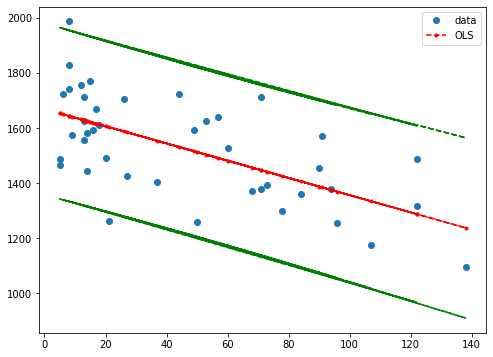

In [252]:
prstd, iv_l, iv_u = wls_prediction_std(results)


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label='data')
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label='OLS')
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

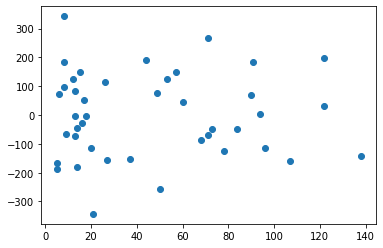

In [253]:
# остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

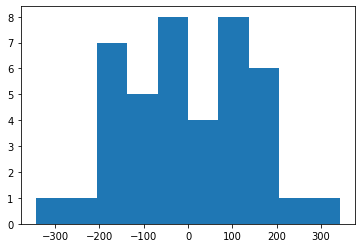

In [254]:
plt.hist(results.resid)

In [255]:
results.resid.median()

-3.431399209571964

Распределение остатков носит околонормальный характер с середины, близкой к 0. Значит основной тренд предсказан верно.

## Задание 2

###текст

In [256]:
# комментарий эксперта
'''

'''

'\n\n'

In [257]:
'''
2. Сохраняется ли аналогичная зависимость для северных и южных городов
по отдельности?
a. Разделить данные на 2 группы
b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

'''

'\n2. Сохраняется ли аналогичная зависимость для северных и южных городов\nпо отдельности?\na. Разделить данные на 2 группы\nb. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности\n\n'

###программа

In [258]:
# import

In [259]:
import pandas as pd
import matplotlib.pyplot as plt


In [260]:
df = pd.read_csv('/content/data/water.csv')

In [261]:
df1 = df[ df['location'] == 'North' ]
df2 = df[ df['location'] == 'South' ]


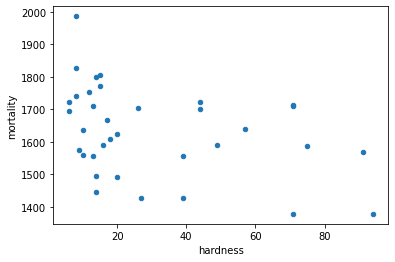

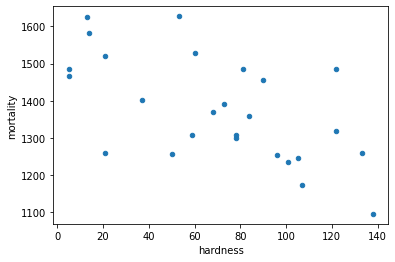

In [262]:
df1.plot(kind='scatter', y='mortality', x='hardness')
df2.plot(kind='scatter', y='mortality', x='hardness')

In [263]:
#Пирсон
df1[['hardness','mortality']].corr()


,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [264]:
df2[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [265]:
df1[['hardness','mortality']].corr(method='spearman')


,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [266]:
df2[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


Как видим, корреляция для северных городов ещё слабее, чем в целом по стране. А для южных - немногим сильнее, но всё равно чуть выше среднего. И в обоих случаях - отрицательная.

###north
Рассмотрим отдельно северные города

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [268]:
X = df1[['hardness']]
y = df1['mortality']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [270]:
X_train.shape

(24, 1)

In [271]:
y_train.shape

(24,)

In [272]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [273]:
model.coef_

array([-1.97686226])

In [274]:
model.intercept_

1688.150229031281

In [275]:
# y = coef_ * x + intercept_
# y = -1.977 * x + 1688

Получили модель, описываемую формулой: y = -1.977 * x + 1688

In [276]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [277]:
y_test

45    1987
23    1574
43    1444
36    1724
26    1591
50    1713
31    1702
22    1742
16    1555
28    1772
17    1428
Name: mortality, dtype: int64

In [278]:
# коэффициент детерминации
model.score(X_test, y_test)

0.018885304285745863

Модель очень плохо описывает отношение переменных - велико влияние неучтённых факторов.

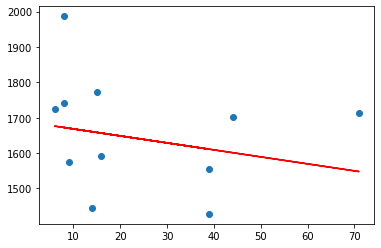

In [279]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [280]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [282]:
# добавить константу
X_const = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [283]:
X_const

,const,hardness
55,1.0,20
1,1.0,17
6,1.0,15
29,1.0,8
46,1.0,14
8,1.0,10
21,1.0,94
3,1.0,14
4,1.0,18
53,1.0,71


In [284]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Fri, 14 Oct 2022   Prob (F-statistic):             0.0316
Time:                        17:08:39   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

In [285]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1688.150229
hardness      -1.976862
dtype: float64
R2:  0.19322282610033503


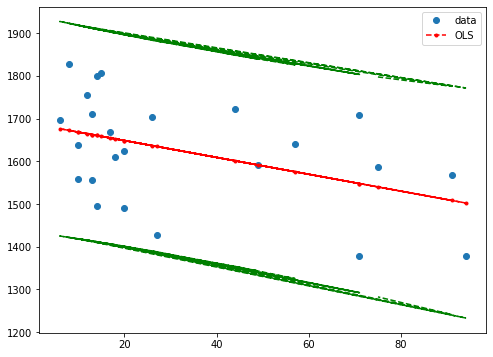

In [286]:
prstd, iv_l, iv_u = wls_prediction_std(results)


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label='data')
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label='OLS')
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

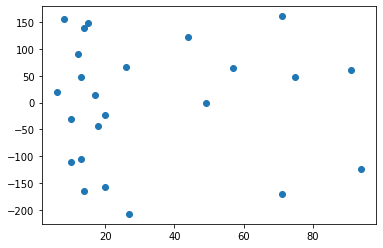

In [287]:
# остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 3., 3., 0., 3., 2., 3., 3., 2., 4.]),
 array([-207.77494801, -170.87675407, -133.97856012,  -97.08036618,
         -60.18217223,  -23.28397829,   13.61421566,   50.5124096 ,
          87.41060354,  124.30879749,  161.20699143]),
 <a list of 10 Patch objects>)

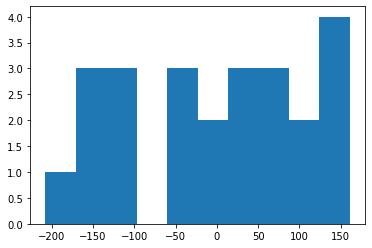

In [288]:
plt.hist(results.resid)

In [289]:
results.resid.median()

16.583686959452734

Распределение остатков носит околонормальный характер с середины, близкой к 0. Значит основной тренд предсказан верно.

###south
Теперь проведём аналогичное исследование для южных городов

In [416]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [417]:
X = df2[['hardness']]
y = df2['mortality']

при random_state=42 - получается неудачное разделение выборок - тестовые значения не отображают общей тенденции. как следствие - r2 получается ниже 0. при случайном выборе зерна - получаются вполне адекватные разделения. приняли значение 10 просто для определенности и повторяемости результатов. 

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [419]:
X_train.shape

(18, 1)

In [420]:
y_train.shape

(18,)

In [421]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [422]:
model.coef_

array([-1.99802076])

In [423]:
model.intercept_

1513.6323039306828

In [424]:
# y = coef_ * x + intercept_
# y = -1.998 * x + 1514

Получили модель, описываемую формулой: y = -1.998 * x + 1514

In [425]:
y_pred = model.predict(X_test)
y_pred

array([1377.76689198, 1471.67386789, 1247.89554232, 1321.82231059,
       1503.64220011, 1357.78668434, 1439.70553566, 1407.73720344])

In [426]:
y_test

47    1369
12    1519
34    1259
14    1254
2     1466
7     1299
27    1402
57    1627
Name: mortality, dtype: int64

In [427]:
# коэффициент детерминации
model.score(X_test, y_test)

0.4983044169271339

Модель не очень хорошо описывает отношение переменных. хотя общий тренд явно совпадает, однако велико влияние неучтённых факторов.

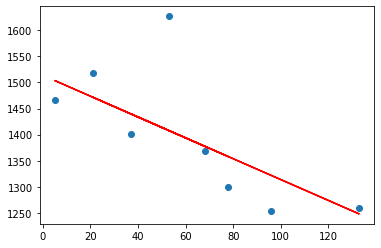

In [428]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [429]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [431]:
# добавить константу
X_const = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [432]:
X_const

,const,hardness
33,1.0,59
32,1.0,14
48,1.0,50
9,1.0,84
58,1.0,122
13,1.0,78
41,1.0,101
25,1.0,138
56,1.0,60
59,1.0,81


In [433]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     7.025
Date:                Fri, 14 Oct 2022   Prob (F-statistic):             0.0175
Time:                        17:50:06   Log-Likelihood:                -111.49
No. Observations:                  18   AIC:                             227.0
Df Residuals:                      16   BIC:                             228.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1513.6323     62.827     24.092      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [434]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1513.632304
hardness      -1.998021
dtype: float64
R2:  0.3051034116464797


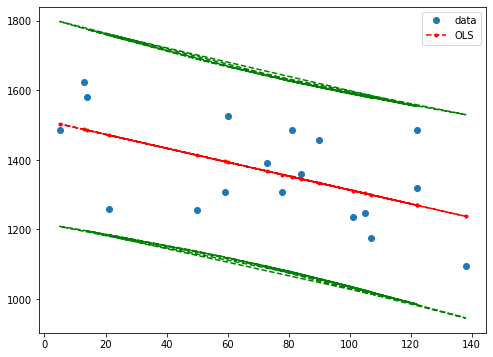

In [435]:
prstd, iv_l, iv_u = wls_prediction_std(results)


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label='data')
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label='OLS')
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

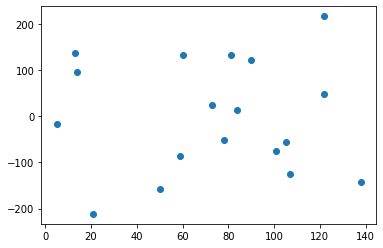

In [436]:
# остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 2., 2., 3., 1., 2., 1., 2., 3., 1.]),
 array([-211.67386789, -168.89385817, -126.11384845,  -83.33383874,
         -40.55382902,    2.22618069,   45.00619041,   87.78620013,
         130.56620984,  173.34621956,  216.12622928]),
 <a list of 10 Patch objects>)

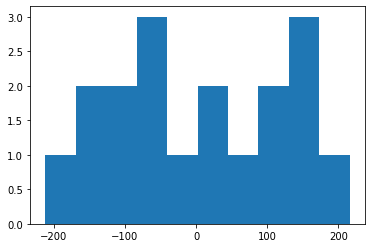

In [437]:
plt.hist(results.resid)

In [438]:
results.resid.median()

-2.220379933345612

Распределение остатков носит почти равномерный характер с серединой, близкой к 0. Значит основной тренд предсказан верно.

In [312]:
z

# Теория

## Корреляция

KeyError: ignored

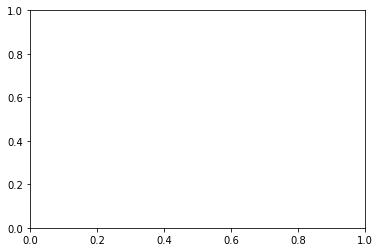

In [313]:
df.plot(kind='scatter', x='CRIM', y='MEDV')

In [ ]:
sns.pairplot(df)

In [ ]:
df.plot(kind='scatter', x='LSTAT', y='RM')

In [ ]:
df.plot(kind='scatter', x='RM', y='MEDV')

In [ ]:
df[['RM','MEDV']].corr(method='kendall')

In [ ]:
df.corr()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

## Регрессия

### sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['CRIM']]
y = df['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
# y = coef_ * x + intercept_

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
# коэффициент детерминации
model.score(X_test, y_test)

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

### statsmodels

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# добавить константу
X_const = sm.add_constant(X_train)

In [ ]:
X_const

In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(results)


fig, ax = plt.subplots(figsize=(8,6))

In [ ]:
# остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

In [ ]:
plt.hist(results.resid)